In [117]:
import numpy as np
import pandas as pd

In [118]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [119]:
df = pd.read_csv('classified_data.csv', index_col = 0)

In [120]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [121]:
classified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


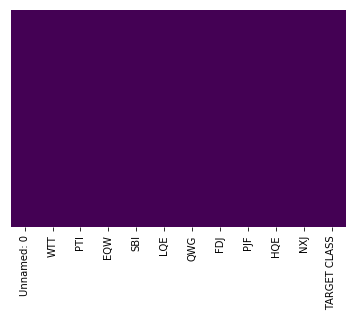

In [122]:
sns.heatmap(data = classified_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# no null value; shows the heatmap

In [123]:
# standarizing the variables..
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()

In [125]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [126]:
print(scaler.mean_)

[0.94968151 1.11430254 0.8341269  0.68209937 1.03233633 0.94353434
 0.96342187 1.0719605  1.15825079 1.3627246 ]


In [127]:
# returns a numpy array of all the values of dataframe, except 'TARGET CLASS'

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [128]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [129]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [130]:
# making a new dataframe -> df_feat off of our scaled features

df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [131]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size = 0.30)

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [136]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [137]:
pred = knn.predict(X_test)

In [138]:
# let's evaluate our knn model

from sklearn.metrics import classification_report, confusion_matrix

In [139]:
print(confusion_matrix(y_test, pred))
print('\n')
print('\t')
print('classification report:')
print('\n')
print('\t')
print(classification_report(y_test, pred))

[[132  18]
 [  8 142]]


	
classification report:


	
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       150
           1       0.89      0.95      0.92       150

   micro avg       0.91      0.91      0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



In [140]:
# now we will try to find the best value for 'K'
# using elbow method

error_list = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predict_i = knn.predict(X_test)
    error_list.append(np.mean(predict_i != y_test))


In [141]:
error_list

[0.08666666666666667,
 0.07333333333333333,
 0.07333333333333333,
 0.056666666666666664,
 0.06,
 0.05,
 0.06666666666666667,
 0.07,
 0.07333333333333333,
 0.07,
 0.07333333333333333,
 0.06333333333333334,
 0.06666666666666667,
 0.06,
 0.06333333333333334,
 0.07,
 0.06333333333333334,
 0.07,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.056666666666666664,
 0.06,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.06,
 0.056666666666666664,
 0.056666666666666664,
 0.05333333333333334,
 0.06,
 0.056666666666666664,
 0.06333333333333334]

Text(0, 0.5, 'ERROR RATE')

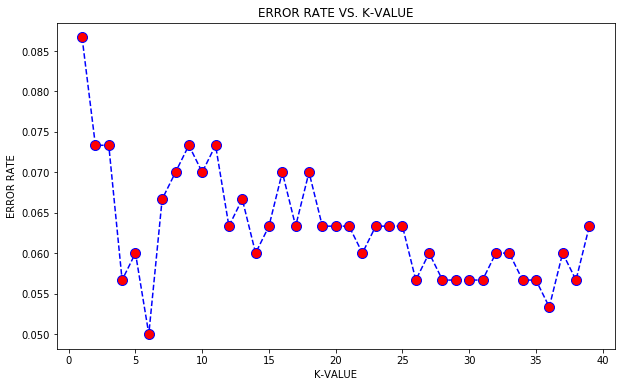

In [148]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_list, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red',
        markersize = 10)

plt.title('ERROR RATE VS. K-VALUE')
plt.xlabel('K-VALUE')
plt.ylabel('ERROR RATE')

In [64]:
# with K = 1
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.89      0.91      0.90       149

   micro avg       0.90      0.90      0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [74]:
# NOW with K = 23

knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)

print('WITH K = 23')
print('\n')
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test, predict))


WITH K = 23


[[139  12]
 [ 10 139]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       151
           1       0.92      0.93      0.93       149

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [149]:
# SINCE our plot shows that around k = 23 , the error rate hovers around 0.060-0.065
# so we have chosen a good estimate value '23' for 'k'